In [607]:
import pandas as pd
import numpy as np
import random 
import matplotlib.pyplot as plt
df =pd.read_csv("./data.csv")


In [608]:
df.shape

(248, 5)

In [609]:
df.describe()

,Feature1,Feature2,Feature3,Feature4,Feature5
count,248.000000,248.000000,248.000000,248.000000,248.000000
mean,109.645161,124.419355,116.286290,112.451613,3.958226
std,32.450696,45.705021,32.165354,41.541912,2.340100
min,50.000000,52.000000,59.000000,50.000000,0.000000
25%,84.000000,89.000000,92.750000,79.000000,2.177500
50%,104.000000,119.000000,112.500000,103.500000,3.630000
75%,129.750000,153.250000,138.000000,135.000000,5.360000
max,203.000000,318.000000,213.000000,233.000000,12.190000


In [610]:
# THe program is taking the data file as input and then 3 features are being selected
# the min of the features selected is very much near 50 max is 240
arr1 =[]
arr2 =[]


arr1=df.iloc[:,1].values
arr2=df.iloc[:,3].values
df1= pd.DataFrame({
    'arr1' : arr1 , 'arr2' :arr2
})
df1


,arr1,arr2
0,79,68
1,76,69
2,97,50
3,77,76
4,54,95
...,...,...
243,318,89
244,148,129
245,228,84
246,178,158


In [611]:
np.random.seed(200)
k=5
centroids = {
    i+1 : [np.random.randint(49,240),np.random.randint(49,240)]
    for i in range(k)
}
centroids

{1: [75, 154], 2: [65, 117], 3: [91, 232], 4: [125, 128], 5: [138, 63]}

In [612]:
def ploting (plt):
    for i in centroids.keys():
        plt.scatter(*centroids[i], color=colmap[i])
    plt.xlim(45,250)
    plt.ylim(45,250)
    

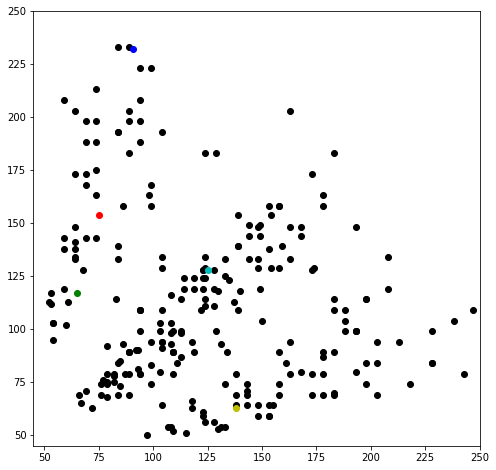

In [613]:
#5 centroids are marked on a cluster 
fig = plt.figure(figsize=(8,8))
plt.scatter(arr1, arr2, color='k')
colmap = {1 :'r' , 2:'g' ,3:'b',4 :'c' ,5 :'y'}
ploting(plt)
plt.show()


In [614]:
# sqrt((x1 -x2))^2 -(y1 -y2)^2) 
def assigment(df1,centroids):
    for i in centroids.keys():
        df1['distance_from_{}'.format(i)] =(
            np.sqrt(
                (df1['arr1'] - centroids[i][0]) ** 2
                +(df1['arr2'] - centroids[i][1]) ** 2
            )
        )
    centroids_distance_columns =['distance_from_{}'.format(i) for i in centroids.keys()]
    df1['closest'] = df1.loc[:,centroids_distance_columns].idxmin(axis=1)
    df1['closest']= df1['closest'].map(lambda x:int(x.lstrip('distance_from_')))
    df1['color'] = df1['closest'].map(lambda x: colmap[x])
    return df1
df1 = assigment(df1,centroids)
print(df1.head())
# assigning each point to one of the cluster 
# we ill assign the point to closes cluster 


   arr1  arr2  distance_from_1  distance_from_2  distance_from_3  \
0    79    68        86.092973        50.960769       164.438438   
1    76    69        85.005882        49.244289       163.688729   
2    97    50       106.301458        74.249579       182.098874   
3    77    76        78.025637        42.720019       156.626945   
4    54    95        62.625873        24.596748       141.908421   

   distance_from_4  distance_from_5  closest color  
0        75.604233        59.211485        2     g  
1        76.694198        62.289646        2     g  
2        82.873397        43.011626        5     y  
3        70.767224        62.369865        2     g  
4        78.294317        89.888820        2     g  


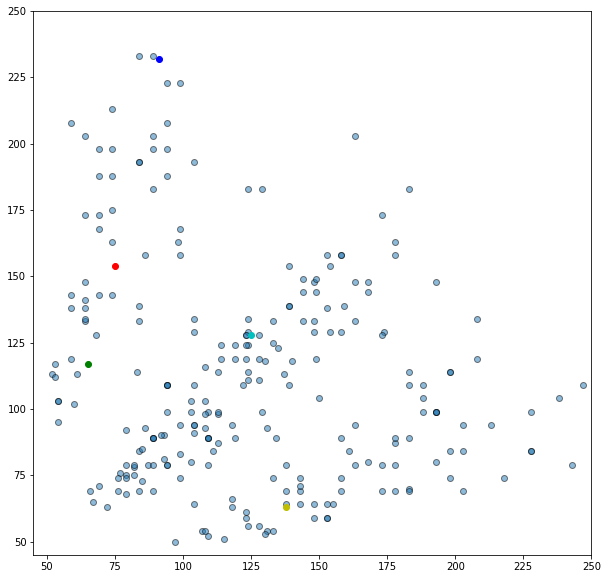

In [615]:
fig = plt.figure(figsize=(10,10))
plt.scatter(df1['arr1'],df1['arr2'], alpha=0.5 , edgecolor='k')
ploting(plt)
plt.show()

In [616]:
import copy
old_centroids = copy.deepcopy(centroids)

# assigning the new closest points as centroids to our points 
def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df1[df1['closest'] == i]['arr1'])
        centroids[i][1] = np.mean(df1[df1['closest'] == i]['arr2'])
    return k

centroids = update(centroids)

centroids
    

{1: [77.14285714285714, 160.66666666666666],
 2: [76.63829787234043, 92.36170212765957],
 3: [88.6470588235294, 207.11764705882354],
 4: [140.4578313253012, 127.10843373493977],
 5: [155.8625, 76.275]}

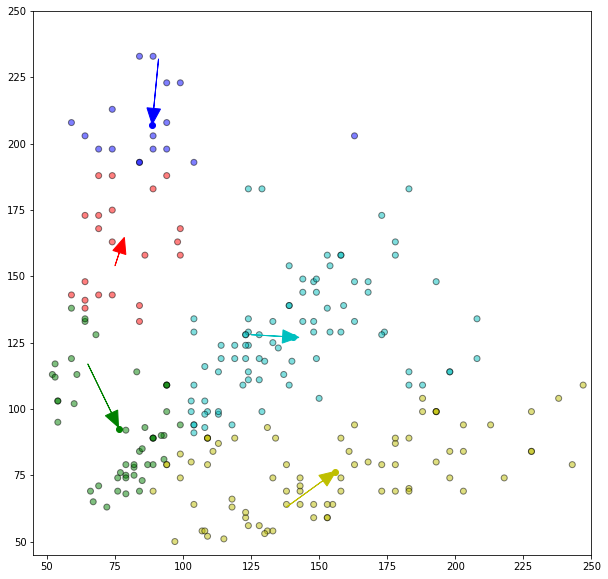

In [617]:
fig = plt.figure(figsize=(10,10))

ax= plt.axes()
plt.scatter(df1['arr1'],df1['arr2'] , color = df1['color'] , alpha =0.5 , edgecolor ='k')
ploting(plt)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx= (centroids[i][0] - old_centroids[i][0] ) * 0.75
    dy= (centroids[i][1] - old_centroids[i][1] ) * 0.75
    ax.arrow(old_x ,old_y , dx , dy , head_width=5 , head_length=6 , fc = colmap[i] ,ec=colmap[i])
plt.show()
b=plt.show()   


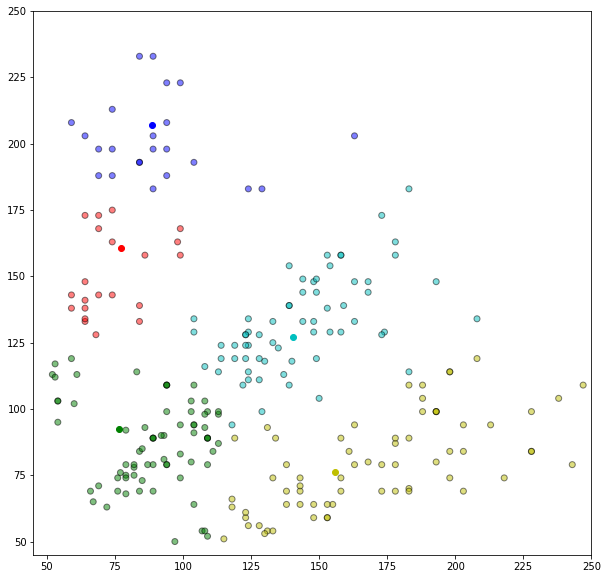

In [618]:
df1 = assigment(df1,centroids)
fig = plt.figure(figsize=(10,10))
plt.scatter(df1['arr1'],df1['arr2'],color = df1['color'] , alpha=0.5 , edgecolor='k')
ploting(plt)
plt.show()


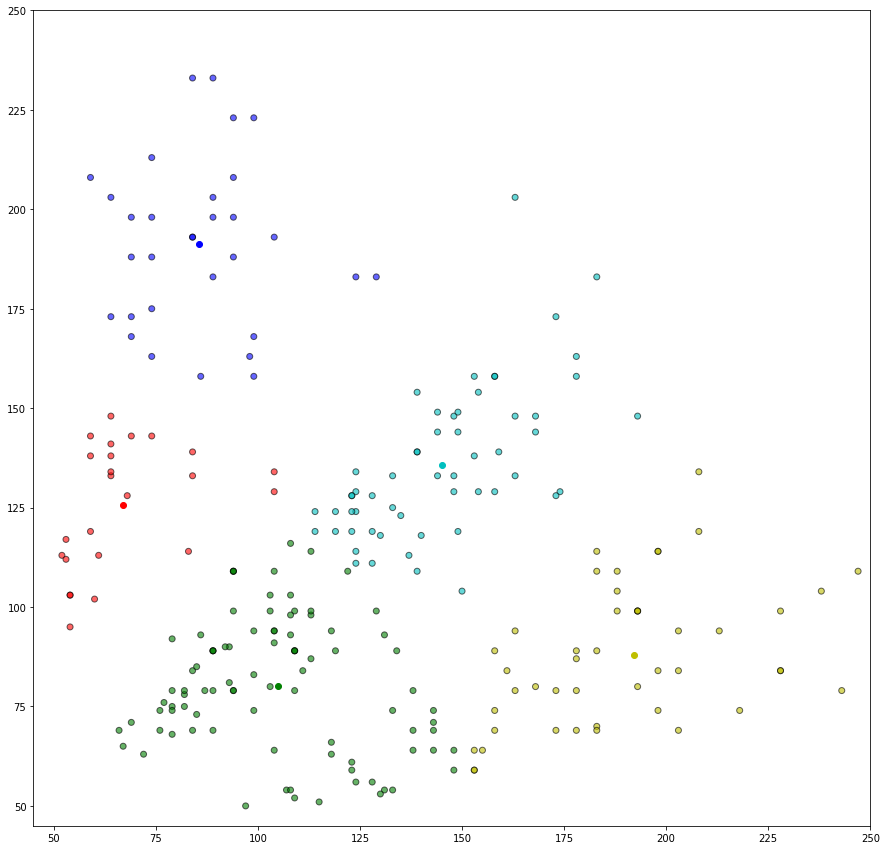

 the number of iteration it took were 5


In [619]:
# now ill iterate till the assigned categories do not change with centroids
# maximum iteartions are 100 if exceeds then it will break 
i=0
while True:
    closest_cetroids =df1['closest'].copy(deep=True)
    centroids =update(centroids)
    df1 = assigment(df1,centroids)
    
    if closest_cetroids.equals(df1['closest']):
        break
    elif i >= 100:
        break
    i= i+1
fig = plt.figure(figsize=(15,15))
plt.scatter(df1['arr1'],df1['arr2'],color = df1['color'] , alpha=0.6 , edgecolor='k')
for i in centroids.keys():
        plt.scatter(*centroids[i], color=colmap[i])
       
plt.xlim(45,250)
plt.ylim(45,250)
        
plt.show()
print(" the number of iteration it took were {}".format(i))
    
    

In [620]:
one= df1['arr1']
two= df1['arr2']
three= df1['color']
df2= pd.DataFrame({
    'x point' : one , 'y point' :two, 'code': three 
})
df2.to_csv("clustered_data.csv")
df2.head()


,x point,y point,code
0,79,68,g
1,76,69,g
2,97,50,g
3,77,76,g
4,54,95,r


In [621]:
# gathering my clusters here and saving them into a csv 

       

In [622]:
# using sklearn direct method 
from sklearn.cluster import KMeans

df1= pd.DataFrame({
    'arr1' : arr1 , 'arr2' :arr2
})

kmeans = KMeans(n_clusters=5)
kmeans.fit(df)



KMeans(n_clusters=5)

In [623]:
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_
df1['labels'] = labels


KeyError: 0

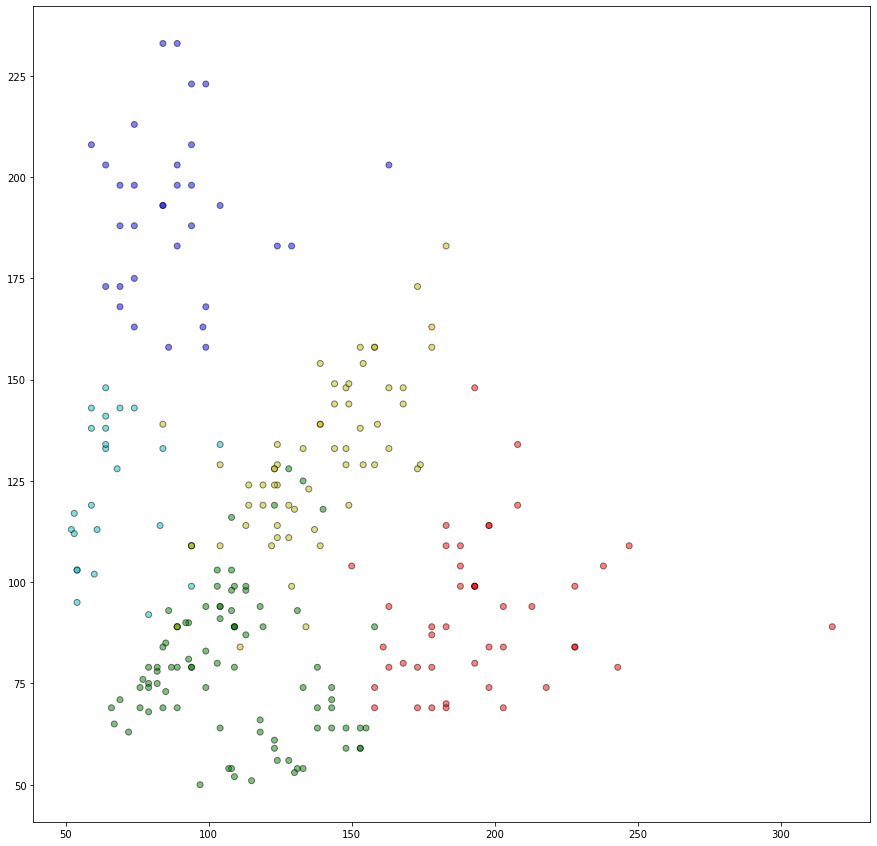

In [624]:
fig = plt.figure(figsize=(15,15))
colors =map(lambda x: colmap[x+1], labels)
colors1 = list(colors)
plt.scatter(df1['arr1'],df1['arr2'],color =colors1 ,alpha =0.5 ,edgecolor='k')

for i, centroid in enumerate(centroids):
    plt.scatter(*centroid, color= colmap[i])
plt.xlim(45,250)
plt.ylim(45,250)
plt.show()
    

In [ ]:
di = { 0:'b' ,  1 :'g' , 2: 'y' , 3:'r' , 4: 'c' }
df1 = df1.replace({"labels": di})



In [ ]:
g =(df1["labels"] == 'g').sum()
b =(df1["labels"] == 'b').sum()
r =(df1["labels"] == 'r').sum()
y =(df1["labels"] == 'y').sum()
c =(df1["labels"] == 'c').sum()
l1 = [g,b,r,y,c]


In [ ]:
dffinal =pd.read_csv("clustered_data.csv")
dffinal.head()
g2 = (dffinal["code"] == 'g').sum()
b2 = (dffinal["code"] == 'b').sum()
r2 = (dffinal["code"] == 'r').sum()
y2 = (dffinal["code"] == 'y').sum()
c2 = (dffinal["code"] == 'c').sum()
l2 = [g2,b2,r2,y2,c2]

In [625]:
code=['green','blue','red','yellow','cyan']
for r in range(0,5):
    p=r+1
    print("From library THe number of {} or members in {} cluster are  {} ".format(code[r], p , l1[r]))
    print("without library THe number of {} or members in {} cluster are  {} ".format(code[r], p , l2[r]))
print(l1)
print(l2)
    

From library THe number of green or members in 1 cluster are  87 
without library THe number of green or members in 1 cluster are  90 
From library THe number of blue or members in 2 cluster are  44 
without library THe number of blue or members in 2 cluster are  31 
From library THe number of red or members in 3 cluster are  25 
without library THe number of red or members in 3 cluster are  24 
From library THe number of yellow or members in 4 cluster are  32 
without library THe number of yellow or members in 4 cluster are  47 
From library THe number of cyan or members in 5 cluster are  60 
without library THe number of cyan or members in 5 cluster are  56 
[87, 44, 25, 32, 60]
[90, 31, 24, 47, 56]
